In [3]:
import ndjson
import os
import json
import random
import math
import re
from functools import partial
from tqdm import tqdm
import matplotlib.pyplot as plt

# The Stack Code

## Full Dataset Statistics

In [5]:
cumsize = 0
cumtokens = 0
with open("stack-code/stats.json") as f: 
    stats = json.load(f)
    
for key in stats:
    print(key.upper())
    tokens = stats[key]["tokens"]/10**9
    cumtokens += tokens
    print(f"tokens: {tokens:.4f} B")
    size = stats[key]["size"]/10**9
    cumsize += size
    print(f"size: {size:.4f} GB\n")

print("CUMULATIVE:")
print(f"tokens: {cumtokens:.4f} B")
print(f"size: {cumsize:.4f} GB\n")

R
tokens: 0.0579 B
size: 0.1859 GB

MAPLE
tokens: 0.0069 B
size: 0.0141 GB

GAP
tokens: 0.0049 B
size: 0.0124 GB

LEAN
tokens: 0.0327 B
size: 0.0951 GB

ISABELLE
tokens: 0.0294 B
size: 0.0906 GB

PYTHON
tokens: 0.0000 B
size: 17.2526 GB

JUPYTER-NOTEBOOK
tokens: 0.2785 B
size: 3.9098 GB

JULIA
tokens: 0.4185 B
size: 1.2898 GB

C
tokens: 0.0175 B
size: 0.0579 GB

CPP
tokens: 0.7830 B
size: 2.9379 GB

TEX
tokens: 0.6140 B
size: 2.0729 GB

CUMULATIVE:
tokens: 2.2433 B
size: 27.9191 GB



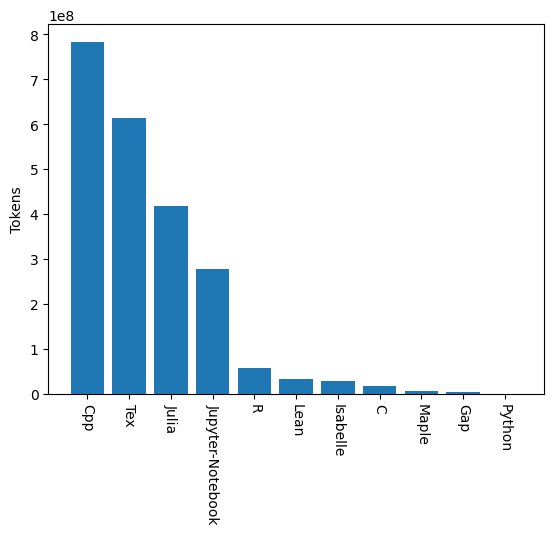

In [10]:
pairs = [(key.title(), stats[key]["tokens"]) for key in stats]

pairs = sorted(pairs, key = lambda x: -x[1])

plt.bar([x[0] for x in pairs], [x[1] for x in pairs])
plt.ylabel('Tokens')
# plt.yscale('log')
plt.xticks(rotation=-90)
plt.show()

## Defining generic data analysis utilities

In [354]:
def numerical_density(ex):
    # The ratio of digit characters over non-digit characters in the file
    txt = ''.join(ex["text"].split())
    ntoks = sum(txt.count(c) for c in "0123456789")
    return ntoks / len(txt)

def print_ex(example): 
    text = example["text"]
    print(f"numeric density: {numerical_density(example)}")
    print(f"length (characters): {len(text)}")
    print(example["meta"]["max_stars_repo_name"])
    print(example["meta"]["max_stars_repo_path"] + "\n" + "#"*40 + "\n")
    print(text)
    
class Printer: 
    def __init__(self, data):
        self.data = data
        self.index = 0 
        self.rindex = len(data)-1
    def print_head(self): 
        print(f"index: {self.index}")
        print_ex(self.data[self.index])
        self.index += 1
    def print_tail(self): 
        print(f"index: {self.rindex}")
        print_ex(self.data[self.rindex])
        self.rindex -= 1

## Per-language analysis
Workflow for manually inspecting the quality of samples in a particular language. 

The stack has a ton of data quality issues so this is important

In [861]:
lang = "maple"
shard = "0000"

In [862]:
with open(f"stack-code/train/{lang}{shard}.jsonl") as f: 
    ds = ndjson.load(f)

print("len: ", len(ds))

len:  1203


### Random Sample Analysis

In [863]:
shuffle_ds = ds
random.shuffle(ds)
shuffle_printer = Printer(shuffle_ds)

In [887]:
shuffle_printer.print_head()

index: 23
numeric density: 0.25924915856270536
length (characters): 150339
intv0id/psi
test/r2/data/DigitRecognitionEq/hakaru300.mpl
########################################

Bind(Msum(Weight(0.098717,Ret(0)),Weight(0.11237,Ret(1)),Weight(0.0993,Ret(2)),Weight(0.10218,Ret(3)),Weight(0.097367,Ret(4)),Weight(0.09035,Ret(5)),Weight(0.098633,Ret(6)),Weight(0.10442,Ret(7)),Weight(0.097517,Ret(8)),Weight(0.09915,Ret(9))),y,Bind(Ite(y=0,Bind(Bernoulli(0.00016878),x1,Observe(x1=true,Bind(Bernoulli(0.00016878),x2,Observe(x2=true,Bind(Bernoulli(0.00016878),x3,Observe(x3=true,Bind(Bernoulli(0.00016878),x4,Observe(x4=true,Bind(Bernoulli(0.00016878),x5,Observe(x5=true,Bind(Bernoulli(0.00016878),x6,Observe(x6=true,Bind(Bernoulli(0.00016878),x7,Observe(x7=true,Bind(Bernoulli(0.00016878),x8,Observe(x8=true,Bind(Bernoulli(0.00033755),x9,Observe(x9=true,Bind(Bernoulli(0.00016878),x10,Observe(x10=true,Bind(Bernoulli(0.00016878),x11,Observe(x11=true,Bind(Bernoulli(0.00016878),x12,Observe(x12=true,Bind(Ber

### Length analysis

In [888]:
length_ds = sorted(ds, key= lambda x: len(x["text"]))
length_printer = Printer(length_ds)

In [915]:
length_printer.print_head()

index: 26
numeric density: 0.03225806451612903
length (characters): 81
Hiroya-W/lang-processing
samples/program2/sample23.mpl
########################################

program assignchar;	{sample23}
var x,y : char;
begin
x := 'X';y := 'Y'  end.



In [920]:
length_printer.print_tail()

index: 1198
numeric density: 0.3372323284262256
length (characters): 653988
jaouahbi/VampPlugins
marsyas-vamp/marsyas/src/ofApps/ofMarsyasExample/bin/data/peakClustering.mpl
########################################

# MarSystemComposite
# Type = Series
# Name = mainNet

# MarControls = 15
# mrs_bool/active = 1
# LinksTo = 0
# LinkedFrom = 0
# mrs_bool/debug = 0
# LinksTo = 0
# LinkedFrom = 0
# mrs_bool/mute = 0
# LinksTo = 0
# LinkedFrom = 0
# mrs_bool/verbose = 0
# LinksTo = 0
# LinkedFrom = 0
# mrs_natural/inObservations = 1
# LinksTo = 0
# LinkedFrom = 0
# mrs_natural/inSamples = 512
# LinksTo = 0
# LinkedFrom = 0
# mrs_natural/inStabilizingDelay = 0
# LinksTo = 0
# LinkedFrom = 0
# mrs_natural/onObservations = 1
# LinksTo = 0
# LinkedFrom = 0
# mrs_natural/onSamples = 512
# LinksTo = 0
# LinkedFrom = 0
# mrs_natural/onStabilizingDelay = 0
# LinksTo = 0
# LinkedFrom = 0
# mrs_real/israte = 22050
# LinksTo = 0
# LinkedFrom = 0
# mrs_real/osrate = 44100
# LinksTo = 0
# LinkedFrom = 0


## Numerical density analysis

In [927]:
num_ds = sorted(ds, key= lambda x: numerical_density(x))
num_printer = Printer(num_ds)

In [929]:
num_printer.print_head()

index: 1
numeric density: 0.0
length (characters): 44
Hiroya-W/lang-processing
program2/answers/sample024.mpl
########################################

program Write;
begin
    ;
    writeln('It'



In [367]:
num_printer.rindex += 1

In [959]:
num_printer.print_tail()

index: 1173
numeric density: 0.40263543191800877
length (characters): 1614
pwang234/lsms
libxc-5.1.6/maple/mgga_exc/mgga_x_br89_explicit.mpl
########################################

(*
 Copyright (C) 2017 M.A.L. Marques

 This Source Code Form is subject to the terms of the Mozilla Public
 License, v. 2.0. If a copy of the MPL was not distributed with this
 file, You can obtain one at http://mozilla.org/MPL/2.0/.
*)

(* type: mgga_exc *)
(* prefix:
  mgga_x_br89_params *params;

  assert(p->params != NULL);
  params = (mgga_x_br89_params * )(p->params);
*)

$include "mgga_x_br89.mpl"

(* This is only used in B00 *)
params_a_at := 0:

br89_y := Q -> 2*Pi^(2/3)/(3*Q):

(* lower piece *)
pgk_a1 := 1.5255251812009530:
pgk_a2 := 0.4576575543602858:
pgk_a3 := 0.4292036732051034:

pgk_b  := [0.4771976183772063, -1.7799813494556270, 3.8433841862302150,
       -9.5912050880518490, 2.1730180285916720, -30.425133851603660]:

pgk_c  := [0.7566445420735584, -2.6363977871370960, 5.4745159964232880,

# WARNING: All the code below this cell is probably broken

## Generic Filter Debugging Utilities

We define a utility function to load the full dataset for a given language.

We define some generic utilities to filter and visualize datasets.

In [9]:
def example_str(ex):
    """
    A rendering of a data sample as a single Julia string.
    """
    return "\n\n".join([
        "# " + ex["max_stars_repo_name"],
        "# " + ex["max_stars_repo_path"],
        ex["content"]])

def filtered(filter, dataset):
    return [d for d in dataset if filter(d)]

def sorted_by_size(dataset):
    return sorted(dataset, key=lambda x: x["size"], reverse=True)

def save_examples(examples, dir, ext="txt", max_num=None):
    dir = os.path.join("analysis", dir)
    os.makedirs(dir, exist_ok=True)
    for i, d in enumerate(examples):
        print(example_str(d), file=open(os.path.join(dir, f"{i}.{ext}"), "w"))
        if max_num is not None and i >= max_num:
            break

def total_size(ds):
    return sum(d["size"] for d in ds) / 1e9

## Designing the Julia Filter

We first load the full Julia dataset and plot a histogram of file size.

Loading: stack-code/julia/0000000.jsonl.
Loading: stack-code/julia/0000001.jsonl.
Loading: stack-code/julia/0000002.jsonl.
Loading: stack-code/julia/0000003.jsonl.


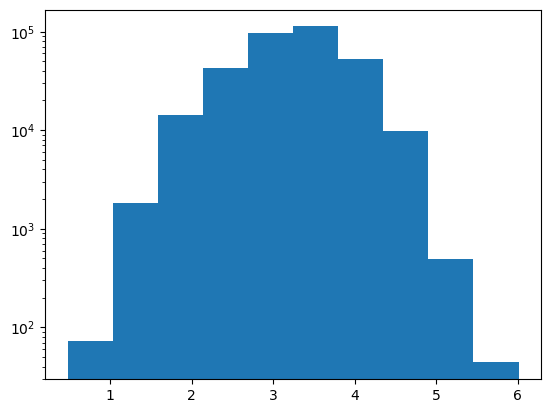

In [11]:
JULIA_DATASET = load_lang_dataset("julia")
plt.hist([math.log10(d["size"]) for d in JULIA_DATASET], log=True)
plt.show()

We can now define the current Julia filter being proposed.

In [12]:
def julia_test_file(ex, ratio=0.1):
    # Whether a file has some minimum ratio of @test statements
    txt = ex["content"]
    kwd = "@test"
    nlines = txt.count("\n") + 1
    return kwd in txt and (txt.count(kwd) / nlines >= ratio)

def julia_numerical_density(ex):
    # The ratio of digit characters over non-digit characters in the file
    txt = ex["content"]
    ntoks = sum(txt.count(c) for c in "0123456789")
    return ntoks / len(txt)

def generated_file(ex):
    #This heuristic happens to be superfluous
    return "generated" in ex["max_stars_repo_name"] or ex["max_stars_repo_name"][0] == "."

def julia_filter(ex):
    if ex["content"][0] in ["%", "{", "["]:
        # Eliminates non-Julia files such as JSON lines (.jl) files 
        return False
    elif ex["size"] >= 1e5:
        # Overly large files are often auto-generated boilerplate and/or mostly
        # contain large arrays of numbers.Thus, we reject such large files unless
        # unless they are test files with low numerical density.
        return julia_test_file(ex) and julia_numerical_density(ex) <= 0.5
    else:
        return True

In [13]:
# A list of keywords that make a Julia file interesting
julia_whitelist = [
    # Popular packages for scientific computing
    "LinearAlgebra",
    "DifferentialEquations",
    "Symbolics",
    "Distributions",
    "DataFrames",
    "DynamicalSystems",
    "Turing",
    "Gen",
    "JuMP",
    # Standard mathematical functions
    "sqrt",
    "abs",
    "zeros",
    "ones",
    "sin",
    "cos",
    "tan",
    "log",
    "exp",
    "integrate",
    "likelihood",
    "Matrix",
    "π",
    "pi",
    "rand",
    "grad"
]

julia_whitelist_rexp = re.compile("|".join("(\\W" + kwd + "\\W)" for kwd in julia_whitelist))

def julia_filter_strict(ex):
    return julia_filter(ex) and julia_whitelist_rexp.search(ex["content"])

In [14]:
# Computing the strict filtered dataset is a bit slow
# This should take about 5-10 minutes.

JULIA_DATASET_FILTERED = filtered(julia_filter, JULIA_DATASET)
JULIA_DATASET_FILTERED_STRICT = filtered(julia_filter_strict, JULIA_DATASET)

print(f"Total: {total_size(JULIA_DATASET):.2f}GB")
print(f"Filtered: {total_size(JULIA_DATASET_FILTERED):.2f}GB")
print(f"Filtered strict: {total_size(JULIA_DATASET_FILTERED_STRICT):.2f}GB")

Total: 1.50GB
Filtered: 1.50GB


In [15]:
def save_julia_filtered_examples():
    dataset_shuffled = JULIA_DATASET_FILTERED.copy()
    random.shuffle(dataset_shuffled)
    dataset_sorted = sorted_by_size(JULIA_DATASET_FILTERED)
    save_examples(dataset_shuffled, "shuffled", max_num=100, ext="jl")
    save_examples(dataset_sorted, "largest", max_num=100, ext="jl")
    save_examples(JULIA_DATASET_FILTERED_STRICT, "strict", max_num=100, ext="jl")

save_julia_filtered_examples()